In [11]:
#some techniques may needed

# 1. concatenate 2 np array
# a=np.array([[1,2]])
# b=np.array([[1,2]])
# print(np.concatenate((a, b), axis=0)) -- print[[1,2],[1,2]]

# 2. table column unique value counts
# print(y_labeled.value_counts())

# 3. np array unique value counts
# unique, counts = np.unique(y_labeled, return_counts=True)
# print(np.asarray((unique, counts)).T) 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

dataFramePath='../data_frame/'
processedDataStorePath = '../processed_data/'

## --------------------------
## Get dataset
## --------------------------

In [13]:
df_train = pd.read_csv(dataFramePath+'1tra.csv')
df_test = pd.read_csv(dataFramePath+'1tst.csv')

In [14]:
column = [df_train.loc[i]['@relation housevotes'][11:-5] for i in range(16)] + ['class'] #16 features and 1 label

print(column,len(column))

['Handicapped_infants', 'Water_project_cost', 'Adoption_budget_resolution', 'Physician_fee_freeze', 'El_salvador_aid', 'Religious_groups_in_schools', 'Anti_satellite_test_ban', 'Aid_to_nicaraguan_contras', 'Mx_missile', 'Immigration', 'Synfuels_corporation_cutback', 'Education_spending', 'Superfund_right_to_sue', 'Crime', 'Duty_free_exports', 'Export_south_africa', 'class'] 17


In [15]:
def getDfArray(df, splitSign):
    totalDataList = []
    startingRow = 20
    endingRow = len(df)-1
    for i in range(startingRow, endingRow):
        dataString = df.iloc[i,0]
        dataList = dataString.split(splitSign)
        newList=[]
        for j in dataList:
            if j=='y' or j=='republican':
                newList.append(1)
            elif j=='n' or j=='democrat':
                newList.append(0)
            else:
                newList.append(-1)
        totalDataList.append(newList)
    return totalDataList

In [16]:
df_train = pd.DataFrame(np.array(getDfArray(df_train,', ')),columns=[j for j in range(17)])    
df_test = pd.DataFrame(np.array(getDfArray(df_test,',')),columns=[j for j in range(17)])  

In [17]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000
mean,0.411483,0.449761,0.521531,0.492823,0.555024,0.641148,0.54067,0.507177,0.483254,0.526316,0.334928,0.464115,0.54067,0.636364,0.358852,0.803828,-0.861244
std,0.493284,0.498664,0.500736,0.501149,0.498156,0.480815,0.49954,0.501149,0.500919,0.500506,0.473099,0.499908,0.49954,0.482201,0.480815,0.398054,0.443847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_train[16].value_counts()

-1    188
 0     13
 1      8
Name: 16, dtype: int64

In [19]:
df_test[16].value_counts()

0    13
1     8
Name: 16, dtype: int64

In [20]:
df_train_labeled = df_train[df_train[16]!=-1]
print(len(df_train_labeled))
df_train_unlabeled = df_train[df_train[16]==-1]
print(len(df_train_unlabeled))

21
188


In [21]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(12,12)) # size
    ax1 = fig.add_subplot(111) # 1 graph 1*1 block
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), cmap=plt.cm.RdYlGn)
    ax1.grid(False)
    plt.title('Correlation Matrix')
    labels=[i for i in range(17)]
    ax1.set_xticks(np.arange(len(labels))) # show all labels
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.5,0,.5,1])
    plt.show()

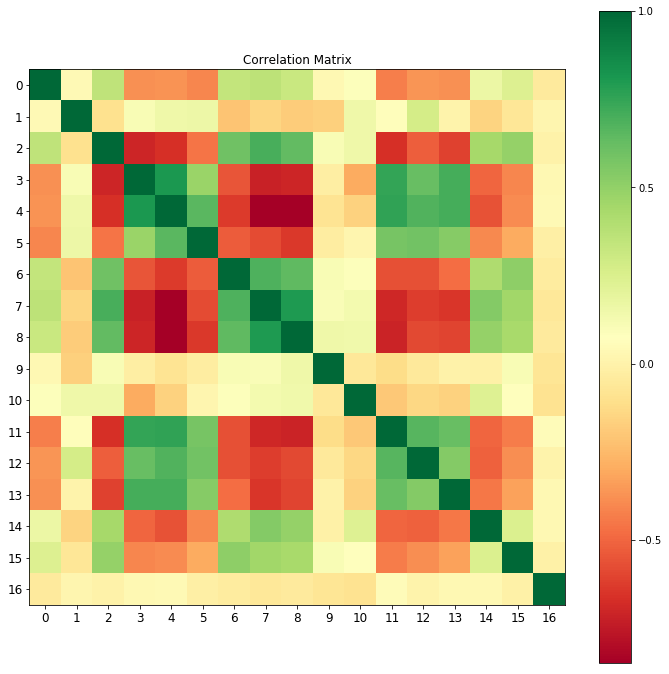

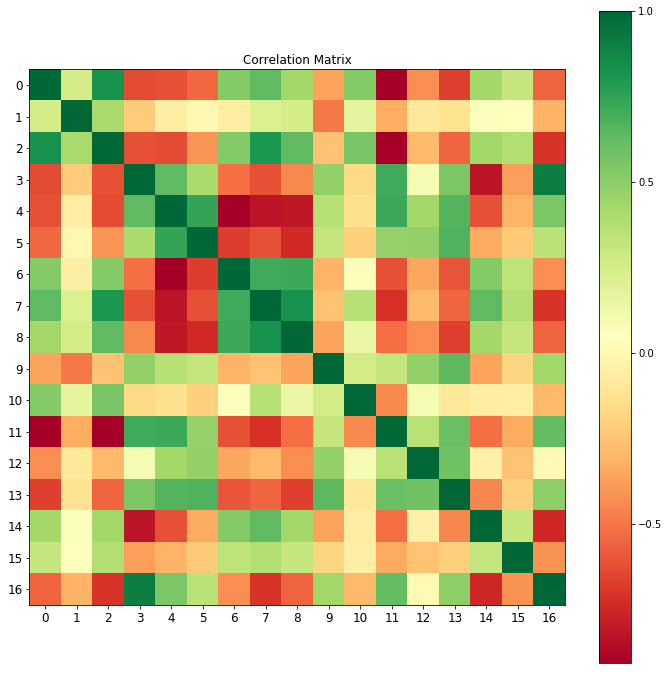

In [22]:
correlation_matrix(df_train)
correlation_matrix(df_test)

In [23]:
# https://explorable.com/statistical-correlation
# -1.0 to -0.5 or 1.0 to 0.5	Strong
# -0.5 to -0.3 or 0.3 to 0.5	Moderate
# -0.3 to -0.1 or 0.1 to 0.3	Weak
# -0.1 to 0.1	None or very weak
df_train_corr = df_train.corr()

In [24]:
df_train_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.045355,0.353238,-0.376954,-0.366488,-0.408220,0.341481,0.357507,0.319874,3.382135e-02,0.086445,-0.427237,-0.360899,-3.785179e-01,0.164976,0.241686,-0.042446
1,0.045355,1.000000,-0.096730,0.109169,0.151496,0.155041,-0.208884,-0.147645,-0.181418,-1.632269e-01,0.153182,0.065055,0.273618,3.635282e-03,-0.155041,-0.062000,0.020786
2,0.353238,-0.096730,1.000000,-0.703456,-0.664893,-0.456987,0.597114,0.703456,0.638756,1.080312e-01,0.152062,-0.664309,-0.517658,-6.045806e-01,0.437019,0.491643,-0.002691
3,-0.376954,0.109169,-0.703456,1.000000,0.805598,0.478090,-0.550954,-0.712859,-0.704298,-2.320251e-02,-0.293978,0.752183,0.620512,7.053652e-01,-0.498042,-0.404752,0.036920
4,-0.366488,0.151496,-0.664893,0.805598,1.000000,0.654888,-0.632097,-0.844114,-0.848833,-7.814461e-02,-0.160170,0.756055,0.681644,7.041440e-01,-0.554528,-0.393843,0.041407
5,-0.408220,0.155041,-0.456987,0.478090,0.654888,1.000000,-0.529432,-0.577851,-0.633893,-3.049255e-02,0.023663,0.576223,0.591493,5.334877e-01,-0.396915,-0.294227,-0.013366
6,0.341481,-0.208884,0.597114,-0.550954,-0.632097,-0.529432,1.000000,0.685384,0.641573,1.062657e-01,0.084487,-0.566876,-0.560564,-4.772016e-01,0.409333,0.511792,-0.036416
7,0.357507,-0.147645,0.703456,-0.712859,-0.844114,-0.577851,0.685384,1.000000,0.800055,9.987169e-02,0.131756,-0.694612,-0.620512,-6.456805e-01,0.537947,0.452953,-0.058534
8,0.319874,-0.181418,0.638756,-0.704298,-0.848833,-0.633893,0.641573,0.800055,1.000000,1.503808e-01,0.145503,-0.707975,-0.588070,-6.025494e-01,0.494164,0.429511,-0.043558
9,0.033821,-0.163227,0.108031,-0.023203,-0.078145,-0.030493,0.106266,0.099872,0.150381,1.000000e+00,-0.057705,-0.116301,-0.047567,-7.298337e-17,-0.009463,0.110497,-0.070621


In [25]:
corrFeatureList = []
for i in range(len(df_train_corr)-1):
    for j in range(i+1, len(df_train_corr)-1):
        if abs(df_train_corr.iloc[i,j])>0.7:
            corrFeatureList.append([i,j])
print(corrFeatureList)
# we have [7,11,13], [2,4,8] two groups so far (3 is almost related all features, so ignore it first)

[[2, 3], [2, 7], [3, 4], [3, 7], [3, 8], [3, 11], [3, 13], [4, 7], [4, 8], [4, 11], [4, 13], [7, 8], [8, 11]]


In [26]:
import random

corrA = [7,11,13]
corrB = [2,4,8]

# for i in range(16):
#     if i not in corrA and i not in corrB:
#         if random.randint(1,100)>50:
#             corrA.append(i)
#         else:
#             corrB.append(i)

corrA = [1, 3, 5, 7, 9, 11, 12, 13]
corrB = [0, 2, 4, 6, 8, 10, 14, 15]

In [27]:
corrA.sort()
corrB.sort()
print(corrA)
print(corrB)

[1, 3, 5, 7, 9, 11, 12, 13]
[0, 2, 4, 6, 8, 10, 14, 15]


## -------------------------------------
## Divide into two dfs
## -------------------------------------

In [28]:
X_train_labeled = np.array(df_train_labeled.iloc[:,:-1])
y_train_labeled = np.array(df_train_labeled.iloc[:,-1])

df_trainA_labeled = df_train_labeled[corrA+[16]]
X_trainA_labeled = np.array(df_trainA_labeled.iloc[:,:-1])
y_trainA_labeled = np.array(df_trainA_labeled.iloc[:,-1])

df_trainB_labeled = df_train_labeled[corrB+[16]]  
X_trainB_labeled = np.array(df_trainB_labeled.iloc[:,:-1])
y_trainB_labeled = np.array(df_trainB_labeled.iloc[:,-1])

X_train_unlabeled = np.array(df_train_unlabeled.iloc[:,:-1])

X_test = np.array(df_test.iloc[:,:-1])
y_test = np.array(df_test.iloc[:,-1])

## -------------------------------------
## Save np
## -------------------------------------

In [29]:
# save the data
np.save(processedDataStorePath+'X_train_labeled.npy', X_train_labeled)
np.save(processedDataStorePath+'y_train_labeled.npy', y_train_labeled)
np.save(processedDataStorePath+'X_trainA_labeled.npy', X_trainA_labeled)
np.save(processedDataStorePath+'y_trainA_labeled.npy', y_trainA_labeled)
np.save(processedDataStorePath+'X_trainB_labeled.npy', X_trainB_labeled)
np.save(processedDataStorePath+'y_trainB_labeled.npy', y_trainB_labeled)
np.save(processedDataStorePath+'X_train_unlabeled.npy', X_train_unlabeled)
np.save(processedDataStorePath+'X_test.npy', X_test)
np.save(processedDataStorePath+'y_test.npy', y_test)